In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/Deep Learning for Computer Vision/Data/MathWorks Created/Fasteners/Classification/Train"

Bolt5_16inx1-1_4in  FinishNail2in    LockSplitWasher1_4in  Screw#6x1inFlat	Screw#8x3_4inPan
Bolt5_16inx1in	    HexNut1_4in      LockSplitWasher3_8in  Screw#8x1-1_2inFlat	Washer3_4inx1_8in
Bolt5_16inx3_4in    HexNut1_4inThin  RoofingNail1-1_4in    Screw#8x1_2Pan	Washer7_8in5_32in
FinishNail1-1_4in   HexNut5_16in     Screw#10x3_4inPan	   Screw#8x3_4inFlat


In [3]:
filename = "/content/drive/MyDrive/Deep Learning for Computer Vision/Data/MathWorks Created/Fasteners/Classification/Train"

In [4]:
!pip install tensorflow # Install tensorflow for image processing
from tensorflow.keras.preprocessing import image_dataset_from_directory # Import for creating dataset
import tensorflow as tf # Import the tensorflow library

filename = "/content/drive/MyDrive/Deep Learning for Computer Vision/Data/MathWorks Created/Fasteners/Classification/Train"

# Create an image dataset using tensorflow's image_dataset_from_directory
imdsFasteners = image_dataset_from_directory(
    filename,
    labels='inferred', # Infer labels from subfolder names
    label_mode='int', # Use integer labels
    image_size=(224, 224), # Resize images (adjust as needed)
    interpolation='nearest',
    batch_size=32, # Adjust batch size as needed
    shuffle=True # Shuffle the dataset
)

Found 977 files belonging to 19 classes.


In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load dataset
dataset_path = "/content/drive/MyDrive/Deep Learning for Computer Vision/Data/MathWorks Created/Fasteners/Classification/Train"
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset (80% train, 20% val)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Check classes
print("Classes:", dataset.classes)
print(f"Training samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}")

Classes: ['Bolt5_16inx1-1_4in', 'Bolt5_16inx1in', 'Bolt5_16inx3_4in', 'FinishNail1-1_4in', 'FinishNail2in', 'HexNut1_4in', 'HexNut1_4inThin', 'HexNut5_16in', 'LockSplitWasher1_4in', 'LockSplitWasher3_8in', 'RoofingNail1-1_4in', 'Screw#10x3_4inPan', 'Screw#6x1inFlat', 'Screw#8x1-1_2inFlat', 'Screw#8x1_2Pan', 'Screw#8x3_4inFlat', 'Screw#8x3_4inPan', 'Washer3_4inx1_8in', 'Washer7_8in5_32in']
Training samples: 781, Validation samples: 196


In [6]:
import torch
import torchvision.models as models

net18 = models.resnet18(pretrained=True)  # Downloads weights automatically

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 211MB/s]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

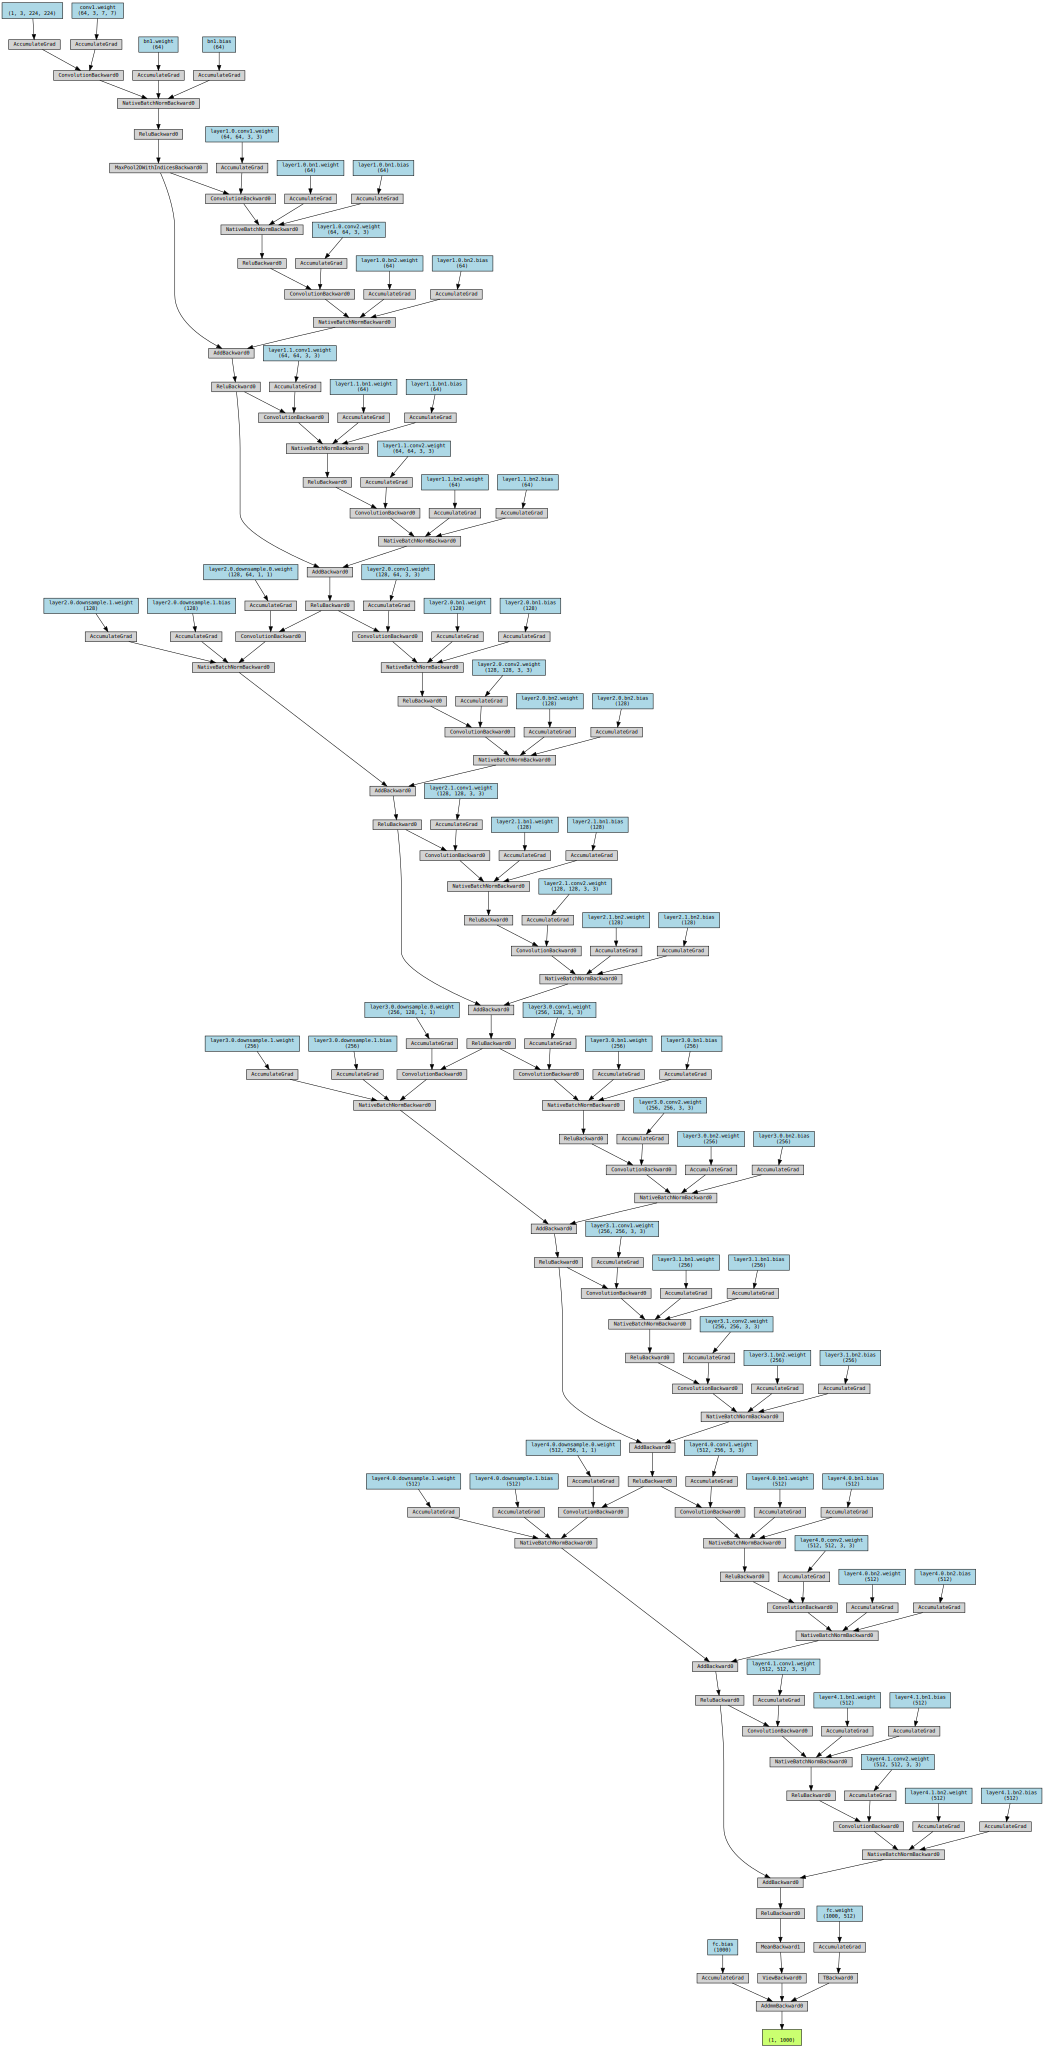

In [7]:
!pip install torchviz # Install the torchviz package
from torchviz import make_dot
import torch
import torchvision.models as models

# Load the pre-trained model
# model = models.resnet18(pretrained=True)
net18.eval()

# Create a dummy input tensor (batch size 1, 3 channels, 224x224 image)
x = torch.randn(1, 3, 224, 224, requires_grad=True)

# Forward pass
output = net18(x)

# Visualize the computation graph
dot = make_dot(output, params=dict(net18.named_parameters()))
dot.render("resnet18_graph", format="png")  # Saves as a PNG file
dot  # Display in Jupyter Notebook

In [8]:
layers = list(net18.children())  # Convert model to a list of layers
for i, layer in enumerate(layers):
    print(f"Layer {i}: {layer}")

Layer 0: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Layer 1: BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
Layer 2: ReLU(inplace=True)
Layer 3: MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
Layer 4: Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Modify the fully connected (FC) layer for 19 classes
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 19)  # New classification layer
model.fc.requires_grad = True  # Unfreeze only the last layer

# Move model to the appropriate device
model.to(device)

# Define loss function and optimizer (only update last layer)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Define data transformations (modify according to dataset)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load training and validation datasets
# train_dataset = datasets.ImageFolder(root="path_to_train_data", transform=transform)
# val_dataset = datasets.ImageFolder(root="path_to_val_data", transform=transform)

# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100 * correct / total
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

        # Validate the model
        validate_model(model, val_loader)

# Validation function
def validate_model(model, val_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100 * correct / total
    print(f"Validation Accuracy: {val_acc:.2f}%")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# Training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100 * correct / total
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

        # Validate the model
        validate_model(model, val_loader)

# Validation function
def validate_model(model, val_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100 * correct / total
    print(f"Validation Accuracy: {val_acc:.2f}%")

# Train the model
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)

# Save the fine-tuned model
torch.save(model.state_dict(), "fine_tuned_resnet18.pth")
print("Model training complete and saved.")

Epoch 1/10, Loss: 2.4163, Train Acc: 25.99%
Validation Accuracy: 25.51%
Epoch 2/10, Loss: 1.4604, Train Acc: 65.43%
Validation Accuracy: 57.14%
Epoch 3/10, Loss: 1.0578, Train Acc: 76.06%
Validation Accuracy: 76.53%
Epoch 4/10, Loss: 0.8399, Train Acc: 84.25%
Validation Accuracy: 83.67%
Epoch 5/10, Loss: 0.6973, Train Acc: 87.58%
Validation Accuracy: 85.20%
Epoch 6/10, Loss: 0.5975, Train Acc: 90.14%
Validation Accuracy: 88.27%
Epoch 7/10, Loss: 0.5376, Train Acc: 91.55%
Validation Accuracy: 87.76%
Epoch 8/10, Loss: 0.4808, Train Acc: 91.42%
Validation Accuracy: 92.86%
Epoch 9/10, Loss: 0.4476, Train Acc: 91.93%
Validation Accuracy: 90.31%
Epoch 10/10, Loss: 0.3960, Train Acc: 92.96%
Validation Accuracy: 89.80%
Model training complete and saved.
